<a href="https://colab.research.google.com/github/IlsuSong/Section1_Project/blob/main/AI_14_%EC%86%A1%EC%9D%BC%EC%88%98_Section1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **다음 분기에 설계해야할 게임의 장르 예측**

파일 업로드

In [ ]:
from google.colab import files
files.upload()

In [3]:
import pandas as pd

df=pd.read_csv("vgames2.csv")

In [ ]:
# df.head()

***EDA***

In [4]:
dfc=df.drop(["Unnamed: 0","Publisher"],axis=1) # 분석에 필요없는 feature 제거

dfc.isnull().value_counts() # null값 존재하는 컬럼 찾기

Name   Platform  Year   Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales
False  False     False  False  False     False     False     False          16277
                 True   False  False     False     False     False            271
                 False  True   False     False     False     False             50
dtype: int64

In [ ]:
# dfc[dfc.Year.isnull() | dfc.Genre.isnull()]

In [5]:
Year_null=dfc[dfc.Year.isnull()].index # YearNaN

for i in Year_null:          #NaN 데이터
  j=0
  for j in range(16598):   #전체 데이터
    if i==j :
      continue
    elif dfc.iloc[i,0]==dfc.iloc[j,0] : #대조
      dfc.iloc[i,2]=dfc.iloc[j,2]  #변경
      break

In [6]:
Genre_null=dfc[dfc.Genre.isnull()].index # GenreNaN

for i in Genre_null:          #NaN 데이터
  j=0
  for j in range(16598):   #전체 데이터
    if i==j :
      continue
    elif dfc.iloc[i,0]==dfc.iloc[j,0] : #대조
      dfc.iloc[i,3]=dfc.iloc[j,3]  #변경
      break

Year와 Genre의 결측치를 채워넣을 정보가 없는 197개의 데이터가 존재한다.

따라서 데이터 분석 시 Year 혹은 Genre를 요구하는 분석이라면 제거할 필요가 있다.

판매량 column값에는 K, M단위를 가진 데이터와 소수점 둘째자리까지 표기된 숫자들이 있는데,
기본 단위가 million으로 추정된다. 따라서 모든 판매량 데이터를 하나의 기준에 맞춰 수정한다.

In [ ]:
# dfc[dfc['NA_Sales'].str.contains('K')]

In [7]:
dfcc=dfc.copy()
dfcc['NA_Sales']=dfcc['NA_Sales'].str.replace("M",'') # M단위 제거

In [8]:
K=dfcc[dfcc['NA_Sales'].str.contains('K')].index

for i in K:
  dfcc.iloc[i,4]=dfcc.iloc[i,4].replace("K",'')
  if float(dfcc.iloc[i,4])==0 :
    continue
  else :
    dfcc.iloc[i,4]=float(dfcc.iloc[i,4])/1000

# K단위 제거 및 M단위로 변경

In [ ]:
# pd.DataFrame(dfcc.iloc[K,4])

In [9]:
dfcc['EU_Sales']=dfcc['EU_Sales'].str.replace("M",'') # 같은 작업 for EU

K2=dfcc[dfcc['EU_Sales'].str.contains('K')].index

for i in K2:
  dfcc.iloc[i,5]=dfcc.iloc[i,5].replace("K",'')
  if float(dfcc.iloc[i,5])==0 :
    continue
  else :
    dfcc.iloc[i,5]=float(dfcc.iloc[i,5])/1000

In [10]:
dfcc['JP_Sales']=dfcc['JP_Sales'].str.replace("M",'') # 같은 작업 for JP

K3=dfcc[dfcc['JP_Sales'].str.contains('K')].index

for i in K3:
  dfcc.iloc[i,6]=dfcc.iloc[i,6].replace("K",'')
  if float(dfcc.iloc[i,6])==0 :
    continue
  else :
    dfcc.iloc[i,6]=float(dfcc.iloc[i,6])/1000

In [11]:
dfcc['Other_Sales']=dfcc['Other_Sales'].str.replace("M",'') # 같은 작업 for Other

K4=dfcc[dfcc['Other_Sales'].str.contains('K')].index

for i in K4:
  dfcc.iloc[i,7]=dfcc.iloc[i,7].replace("K",'')
  if float(dfcc.iloc[i,7])==0 :
    continue
  else :
    dfcc.iloc[i,7]=float(dfcc.iloc[i,7])/1000

In [75]:
year_arr=np.array(dfcc.Year.dropna())

yarr=list(set(year_arr))

yarr

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 86.0,
 1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 97.0,
 96.0,
 98.0,
 95.0,
 2017.0,
 2020.0,
 94.0]

Year column에 0 to 16, 86, 94 to 98 이라는 값이 존재하는데 0 to 16 은 21세기, 86, 94 to 98은 20세기를 의미하므로 다른 연도 표기와 일치시킨다.

In [78]:
for i in range(16598):
  if dfcc.iloc[i,2]<=16:
    dfcc.iloc[i,2]+=2000
  elif dfcc.iloc[i,2]<=98:
    dfcc.iloc[i,2]+=1900

**Q1 : 지역에 따라서 선호하는 게임 장르가 다를까?**

In [12]:
dfcc['NA_Sales']=dfcc['NA_Sales'].astype(float)
dfcc['EU_Sales']=dfcc['EU_Sales'].astype(float)
dfcc['JP_Sales']=dfcc['JP_Sales'].astype(float)
dfcc['Other_Sales']=dfcc['Other_Sales'].astype(float)

In [13]:
lg=dfcc[['Genre','NA_Sales','EU_Sales','JP_Sales','Other_Sales']]

lgg=lg.groupby(dfcc.Genre).sum()

In [14]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [15]:
import numpy as np

In [16]:
lgg['NA_Sales']=np.log(lgg['NA_Sales'])
lgg['EU_Sales']=np.log(lgg['EU_Sales'])
lgg['JP_Sales']=np.log(lgg['JP_Sales'])
lgg['Other_Sales']=np.log(lgg['Other_Sales'])

In [17]:
sc=StandardScaler()

lggsc=sc.fit_transform(lgg)

lggscdf=pd.DataFrame(lggsc,index=lgg.index,columns=lgg.columns) # 지역별판매량x장르 데이터의 표준화

In [18]:
import seaborn as sb
import matplotlib.pyplot as plt

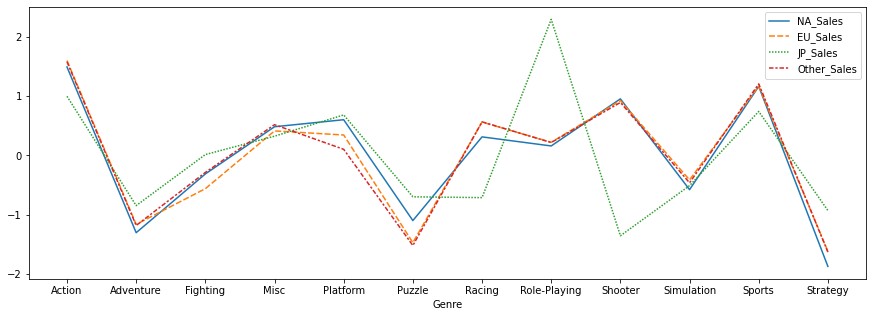

In [19]:
plt.figure(figsize = (15,5))
sb.lineplot(data=lggscdf); # 표준화된 데이터 시각화

전체적으로 비슷한 통계를 나타내지만, 일본에서 특정 장르의 게임의 수요가 다른 지역과 큰 차이를 보인다.

일본은 Role-Playing 게임의 수요가 상대적으로 많고, Racing, Shooter 게임에 대한 수요가 상대적으로 적다.

Action, Sports 게임이 전 지역에서 좋은 지표를 보인다.


**Q2 : 연도별 게임의 트렌드가 있을까?**

In [85]:
nyear_arr=np.array(dfcc.Year.dropna())

nyarr=list(set(nyear_arr))

genre_arr=np.array(dfcc.Genre.dropna())

garr=list(set(genre_arr))

garr

['Action',
 'Misc',
 'Shooter',
 'Puzzle',
 'Sports',
 'Platform',
 'Racing',
 'Role-Playing',
 'Simulation',
 'Strategy',
 'Adventure',
 'Fighting']

In [106]:
garr[1]

'Misc'

In [105]:
dfcc.Year.nunique()

39

In [120]:
yg=dfcc[['Year','Genre']].dropna()

yg



,Year,Genre
0,2008.0,Action
1,2009.0,Action
2,2010.0,Adventure
3,2010.0,Misc
4,2010.0,Platform
...,...,...
16593,2006.0,Platform
16594,2005.0,Action
16595,2015.0,Sports
16596,2013.0,Action


In [ ]:
id = dfcc.Year.dropna().unique()

In [100]:
yggg=yg.pivot(index='Year',columns='Genre',values=

yggg


NameError: ignored

In [108]:
dfcc.Genre.count()

16568

In [ ]:
varr =[]

In [ ]:
# a=[]

# for i in range(dfcc.Year.nunique()):
#   for j in range(dfcc.Genre.nunique()):
#     for k in range(dfcc.Genre.count()):


In [117]:
kkk=yg.groupby(yg.Genre).count()


In [118]:
kkk

,Year
Genre,
Action,3267
Adventure,1273
Fighting,841
Misc,1720
Platform,876
Puzzle,571
Racing,1230
Role-Playing,1469
Shooter,1297
